# Kaggle Training : Titanic

Here we perform an exploratory analysis of the datasets for:
* Titanic Kaggle competition

In [1]:
# Required Libraries
import pandas as pd
import numpy as np

In [2]:
%matplotlib inline

Load the data

In [3]:
# Path of dataset
datasetFolder = 'datasets/'
# Load datasets
df_train = pd.read_csv(datasetFolder + 'train.csv')
df_test = pd.read_csv(datasetFolder + 'test.csv')
df_gendersub = pd.read_csv(datasetFolder + 'gender_submission.csv')

Describe datasets

In [4]:
# Datasets sizes
print ("Train : ", df_train.shape)
print ("Test : ", df_test.shape)
print ("GenderSub : ", df_gendersub.shape)

Train :  (891, 12)
Test :  (418, 11)
GenderSub :  (418, 2)


In [5]:
# Let's review the first records of the dataset
df_train.head()

# # Select just some rows
# df_train[1:10]

# # Select some cols
# df_train[['PassengerId', 'Sex']]

# # Select specific rows and columns
# df_train.loc[0:10, ['PassengerId', 'Sex']]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
# Data types per column
df_train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [7]:
# Basic Statistics 
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
df_test.describe()
# Please note that We don't have the column Survived here

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [9]:
df_gendersub.head()
# This file is just an example, about how we should submit our results

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


Let's review the data

In [10]:
df_gendersub.groupby("Survived").count()

,PassengerId
Survived,
0,266
1,152


In [11]:
df_train.groupby("Sex").count()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Sex,,,,,,,,,,,
female,314,314,314,314,261,314,314,314,314,97,312
male,577,577,577,577,453,577,577,577,577,107,577


In [12]:
df_train[['Survived', 'Sex', 'PassengerId']].pivot_table(index=['Survived', 'Sex'], aggfunc='count')

PassengerId
Survived Sex                
0        female           81
         male            468
1        female          233
         male            109

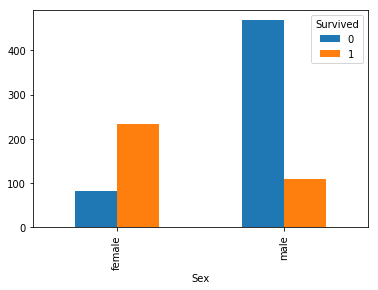

In [13]:
df_train.groupby(['Survived', 'Sex'])['PassengerId'].count().unstack(0).plot.bar()